<a href="https://colab.research.google.com/github/imchandanmohan/DICOM/blob/main/DICOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.9 MB/s eta 0:00:00


In [2]:
pip install pathlib

In [5]:
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt

In [6]:
dicom_file = pydicom.read_file("/content/drive/MyDrive/Data/ID_0000_AGE_0060_CONTRAST_1_CT.dcm")

In [7]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

In [8]:
dicom_file[0x0028, 0x0010]

(0028, 0010) Rows                                US: 512

In [9]:
dicom_file.Rows

512

In [10]:
dicom_file.pixel_array


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

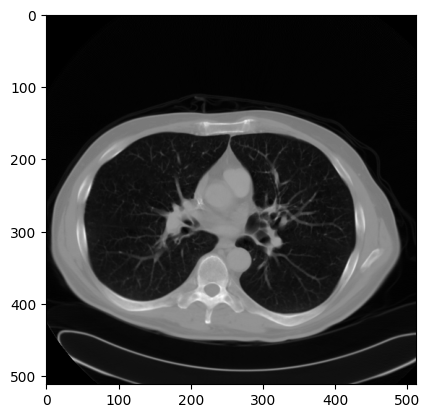

In [11]:
ct = dicom_file.pixel_array
plt.figure()
plt.imshow(ct, cmap="gray")

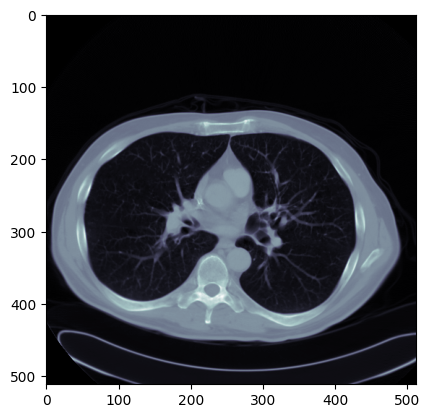

In [12]:
ct = dicom_file.pixel_array
plt.figure()
plt.imshow(ct, cmap="bone")

In [14]:
path_to_head_mri = Path("/content/drive/MyDrive/Data/SE000001")

In [15]:
all_files = list(path_to_head_mri.glob("*"))

In [16]:
all_files

[PosixPath('/content/drive/MyDrive/Data/SE000001/MR000020'),
 PosixPath('/content/drive/MyDrive/Data/SE000001/MR000018'),
 PosixPath('/content/drive/MyDrive/Data/SE000001/MR000022'),
 PosixPath('/content/drive/MyDrive/Data/SE000001/MR000025'),
 PosixPath('/content/drive/MyDrive/Data/SE000001/MR000002'),
 PosixPath('/content/drive/MyDrive/Data/SE000001/MR000013'),
 PosixPath('/content/drive/MyDrive/Data/SE000001/MR000003'),
 PosixPath('/content/drive/MyDrive/Data/SE000001/MR000004'),
 PosixPath('/content/drive/MyDrive/Data/SE000001/MR000005'),
 PosixPath('/content/drive/MyDrive/Data/SE000001/MR000014'),
 PosixPath('/content/drive/MyDrive/Data/SE000001/MR000015'),
 PosixPath('/content/drive/MyDrive/Data/SE000001/MR000012'),
 PosixPath('/content/drive/MyDrive/Data/SE000001/MR000023'),
 PosixPath('/content/drive/MyDrive/Data/SE000001/MR000001'),
 PosixPath('/content/drive/MyDrive/Data/SE000001/MR000008'),
 PosixPath('/content/drive/MyDrive/Data/SE000001/MR000006'),
 PosixPath('/content/dri

In [18]:
mri_data = []

for path in all_files:
  data = pydicom.read_file(path)
  mri_data.append(data)

In [19]:
for slice in mri_data[:5]:
  print(slice.SliceLocation)

119.999996566542
107.999995419197
131.999997780749
149.999999502083
11.9999973042441


In [27]:
mri_data_ordered = sorted(mri_data, key=lambda slice: slice.SliceLocation)

In [28]:
for slice in mri_data_ordered[:5]:
  print(slice.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714


In [30]:
full_volumn = []
for slice in mri_data_ordered:
  full_volumn.append(slice.pixel_array)

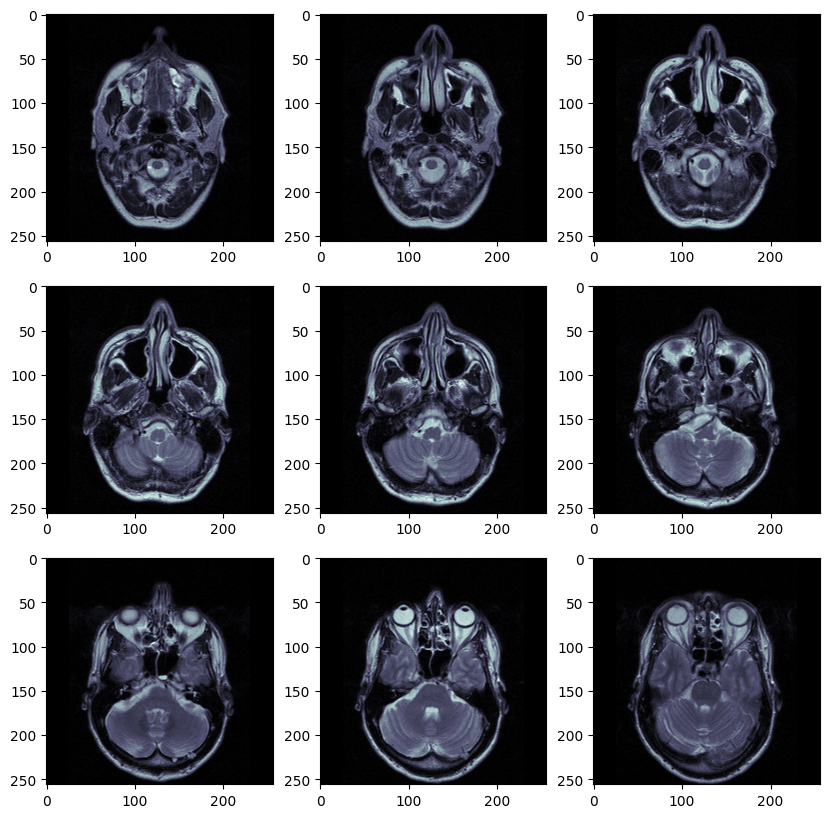

In [37]:
fig, axis = plt.subplots(3,3,figsize=(10,10))

slice_counter = 0
for i in range(3):
  for j in range(3):
    axis[i][j].imshow(full_volumn[slice_counter],cmap="bone")
    slice_counter+=1


In [42]:
pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 14.2 MB/s eta 0:00:00


In [44]:
import SimpleITK as sitk

In [45]:
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))

In [46]:
series_ids

('1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413262801702',)

In [51]:
series_file_name = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri),series_ids[0])

In [52]:
series_file_name

('/content/drive/MyDrive/Data/SE000001/MR000000',
 '/content/drive/MyDrive/Data/SE000001/MR000001',
 '/content/drive/MyDrive/Data/SE000001/MR000002',
 '/content/drive/MyDrive/Data/SE000001/MR000003',
 '/content/drive/MyDrive/Data/SE000001/MR000004',
 '/content/drive/MyDrive/Data/SE000001/MR000005',
 '/content/drive/MyDrive/Data/SE000001/MR000006',
 '/content/drive/MyDrive/Data/SE000001/MR000007',
 '/content/drive/MyDrive/Data/SE000001/MR000008',
 '/content/drive/MyDrive/Data/SE000001/MR000009',
 '/content/drive/MyDrive/Data/SE000001/MR000010',
 '/content/drive/MyDrive/Data/SE000001/MR000011',
 '/content/drive/MyDrive/Data/SE000001/MR000012',
 '/content/drive/MyDrive/Data/SE000001/MR000013',
 '/content/drive/MyDrive/Data/SE000001/MR000014',
 '/content/drive/MyDrive/Data/SE000001/MR000015',
 '/content/drive/MyDrive/Data/SE000001/MR000016',
 '/content/drive/MyDrive/Data/SE000001/MR000017',
 '/content/drive/MyDrive/Data/SE000001/MR000018',
 '/content/drive/MyDrive/Data/SE000001/MR000019',


In [56]:
 series_reader = sitk.ImageSeriesReader()
 series_reader.SetFileNames(series_file_name)

In [58]:
image_data = series_reader.Execute()

In [61]:
head_mri = sitk.GetArrayFromImage(image_data)

In [62]:
head_mri.shape

(27, 256, 256)

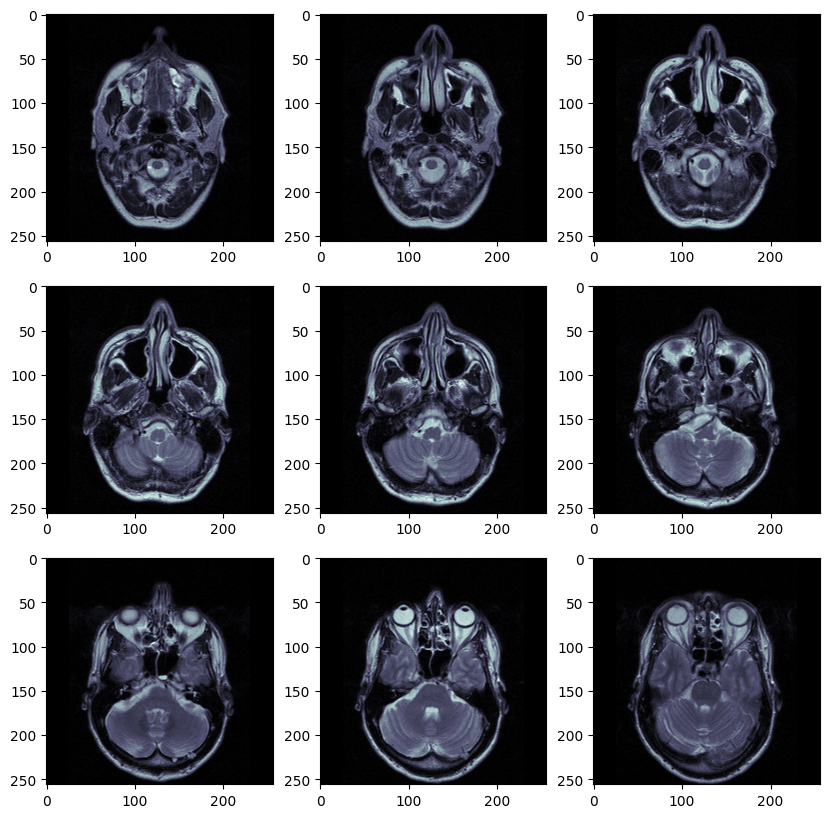

In [63]:
fig, axis = plt.subplots(3,3,figsize=(10,10))

slice_counter = 0
for i in range(3):
  for j in range(3):
    axis[i][j].imshow(head_mri[slice_counter],cmap="bone")
    slice_counter+=1
